# Thomas Schelling's Model of Segregation

In 1971, Thomas Schelling, an Economics Nobel Prize winner, published a simple, yet powerful programmatic model that illustrated how individual preferences of people from different groups (race, gender, ethnicity, etc.) leads to collective segregation. This by  no means was relevant only to society in the 1970's. Segregation exists today in many forms as shown in the distribution of race in Chicago in the image below:

![alt text](racial_segregation.png)

However, the presence of this racial segregation does not necessarily imply individual desires to *exclude* any particular race. And this is precisely what Schelling wanted to show: that even small individual preferences for people to live near others who are like them, lead to large-scale segregation. In other words, the large-scale pattern of racial segregation is *not* revealing of why and how individuals choose to organize themselves.

### Input Parameters

The set-up of this model is quite simple: individual houses (i.e. people) represent cells in a square grid. If the cells around a person does not contain a minimum percentage of people that are like them, then they will move to another cell. They will continue to move to other cells until this minimum percentage is not achieved.

##### Population Size

The number of squares (i.e. houses) in the grid:

In [93]:
population_size = 10000 # population size; i.e. number of houses in the city

##### Ratio of Empty Area to Occupied Area

Specifies the number of empty squares compared to occupied squares:

In [94]:
empty_ratio = 0.1 # ratio of empty houses in the city to occupied houses

##### Similarity Threshold

The minimum percentage of neighbors that a person requires to remain in their square:

In [104]:
similarity_threshold = 0.73 # the minimum fraction of similar neighbors a person requires

Number of Neighbors to Count

Who are counted  as "neighbors." The number of neighboring squares to count as 'neighbors' in each direction (left, right, top, bottom):

In [96]:
n_neighbors = 6 # number of neighboring cells to count as 'neighbors' in each direction (left, right, top, bottom)

### Dependencies

In [68]:
import pandas as pd
import random
import numpy as np
import streamlit as st

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from ipywidgets import IntProgress
from IPython.display import display

### Import Model Functions

In [69]:
from model_functions import set_up_city, get_mean_similarity_ratio, run_simulation, plot_city

### Initialize City & Population

In [105]:
city = set_up_city(population_size, empty_ratio)

In [106]:
# input initial similarity ratio
mean_similarity_ratio = []
mean_similarity_ratio.append(get_mean_similarity_ratio(city, n_neighbors))

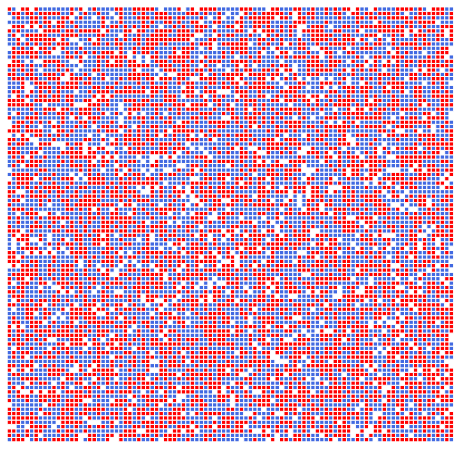

In [107]:
plot_city(city)

### Run Simulation

In [108]:
# a tolerance level; when the difference between the mean similarity ratio from the latest iteration and the 
# previous iteration is less than this amount, then we stop the simulation. We say that the model has "converged."

tol = 0.0001

In [109]:
for i in range(100):
    
    city = run_simulation(city, n_neighbors, similarity_threshold)
    mean_similarity_ratio.append(get_mean_similarity_ratio(city, n_neighbors))
    
    if ((np.absolute(mean_similarity_ratio[-1]-mean_similarity_ratio[-2]) < tol) & (i > 1)):
        print(f"Converged after {i} iterations.")
        break

Converged after 11 iterations.


Text(1, 0.95, 'Similarity Ratio: 0.5654')

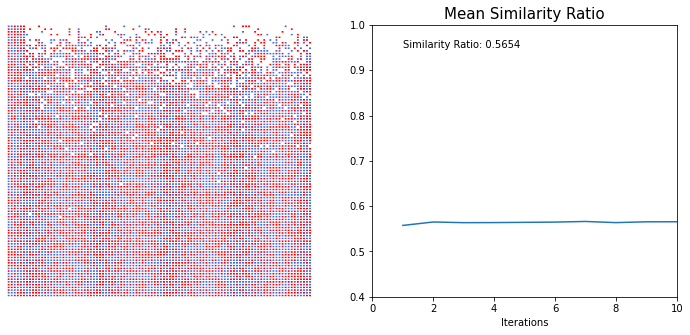

In [103]:
cmap = ListedColormap(['red', 'white', 'royalblue'])

# city_plot = st.pyplot(plt)

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.axis('off')
plt.pcolor(city, cmap=cmap, edgecolors='w', linewidths=1)

plt.subplot(122)
plt.xlabel("Iterations")
plt.xlim([0, i])
plt.ylim([0.4, 1])
plt.title("Mean Similarity Ratio", fontsize=15)
plt.plot(range(1, len(mean_similarity_ratio)+1), mean_similarity_ratio)
plt.text(1, 0.95, "Similarity Ratio: %.4f" % get_mean_similarity_ratio(city, n_neighbors), fontsize=10)

# Run an Experiment

While we can't use this model to answer specific questions about why people choose to associate with others who are the same race, we can use Schelling's model to answer questions about the conditions under which large-scale segregation emerges.?

Here, we will run an experiment to answer the question, "How segregated do the resulting households become across varying similarity tolerance levels?"

Since this model is **stochastic** (random), we want to be able to generate an average result with standard errors to show the range of results that are to be expected at different thresholds.

In [87]:
similarity_threshold_params = [0.36] + list(np.arange(0.4, 0.70, 0.05))

**n_runs** is the number of times we will run the simulation for each similarity threshold. Running multiple times will create a distribution of results for each similarity threshold, and we will calculate the mean and standard deviation using these distributions.

In [45]:
n_runs = 10

In [46]:
runs_results_list = {}

for similarity_threshold in similarity_threshold_params:
    
    print(f"Running simulation for similarity_threshold = {similarity_threshold}. . . .")

    mean_similarity_ratio_overall = []
    n_iterations_list = []
    for r in range(n_runs):

        city = set_up_city(population_size, empty_ratio)
        mean_similarity_ratio = []
        mean_similarity_ratio.append(get_mean_similarity_ratio(city, n_neighbors))
        for i in range(100):

            city = run_simulation(city, n_neighbors, similarity_threshold)
            mean_similarity_ratio.append(get_mean_similarity_ratio(city, n_neighbors))

            if ((np.absolute(mean_similarity_ratio[-1]-mean_similarity_ratio[-2]) < tol) & (i > 1)):
#                 print(f"Converged after {i} iterations.")
                break

        mean_similarity_ratio_overall.append(mean_similarity_ratio[-1])
        n_iterations_list.append(i)

    runs_results_list.update({similarity_threshold: [np.mean(mean_similarity_ratio_overall),
                                                     np.std(mean_similarity_ratio_overall),
                                                     np.mean(n_iterations_list),
                                                     np.std(n_iterations_list)]})

Running simulation for similarity_threshold = 0.35
Running simulation for similarity_threshold = 0.39999999999999997
Running simulation for similarity_threshold = 0.44999999999999996
Running simulation for similarity_threshold = 0.49999999999999994
Running simulation for similarity_threshold = 0.5499999999999999
Running simulation for similarity_threshold = 0.5999999999999999
Running simulation for similarity_threshold = 0.6499999999999999


In [47]:
# convert the list of dicts to a pandas data frame
runs_results_df = pd.DataFrame.from_dict(runs_results_list, orient='index').reset_index()
runs_results_df.columns = ["similarity_threshold", "mean_similarity_ratio", "sd_similarity_ratio", "mean_n_iterations", "sd_n_iterations"]

In [48]:
runs_results_df

,similarity_threshold,mean_similarity_ratio,sd_similarity_ratio,mean_n_iterations,sd_n_iterations
0,0.35,0.559720,0.002261,2.2,0.400000
1,0.40,0.915362,0.012390,20.1,6.300000
2,0.45,0.925739,0.017426,8.1,0.830662
3,0.50,0.928329,0.012029,10.5,2.334524
4,0.55,0.932545,0.010220,9.6,1.019804
5,0.60,0.951671,0.009100,11.4,1.562050
6,0.65,0.965028,0.005905,23.4,4.363485


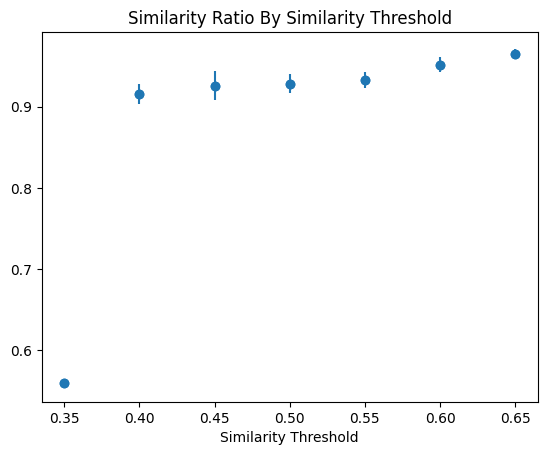

In [49]:
plt.rcdefaults()
fig, ax = plt.subplots()

plt.scatter(runs_results_df["similarity_threshold"], runs_results_df["mean_similarity_ratio"])
 
plt.errorbar(runs_results_df["similarity_threshold"], 
             runs_results_df["mean_similarity_ratio"], 
             yerr=runs_results_df["sd_similarity_ratio"], fmt="o")

plt.xlabel('Similarity Threshold')
plt.title('Similarity Ratio By Similarity Threshold')

plt.show()

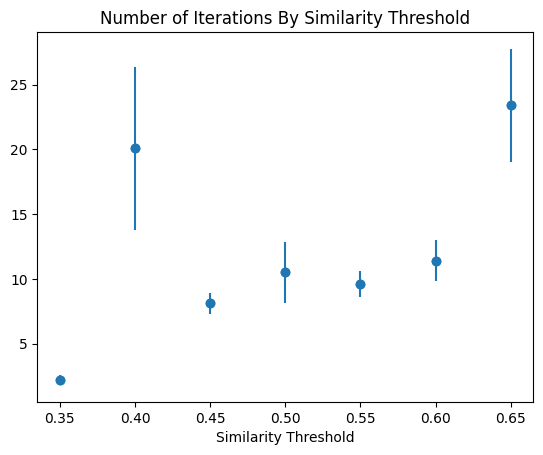

In [50]:
plt.rcdefaults()
fig, ax = plt.subplots()

plt.scatter(runs_results_df["similarity_threshold"], runs_results_df["mean_n_iterations"])
 
plt.errorbar(runs_results_df["similarity_threshold"], 
             runs_results_df["mean_n_iterations"], 
             yerr=runs_results_df["sd_n_iterations"], fmt="o")

plt.xlabel('Similarity Threshold')
plt.title('Number of Iterations By Similarity Threshold')

plt.show()